In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
# Importing the mall dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [26]:
X = dataset.iloc[:, [ 3, 4 ]].values

In [27]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

In [28]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

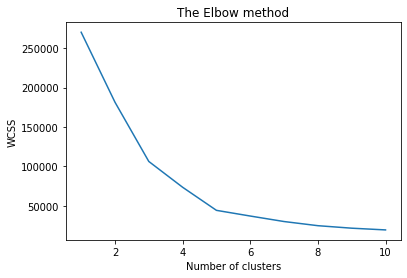

In [29]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
# Applying k-means to the mall dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)

y_kmeans = kmeans.fit_predict(X)

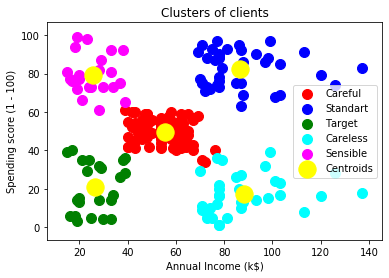

In [43]:
# Visualising the clusters
plt.scatter(X[ y_kmeans == 0, 0 ], X[ y_kmeans == 0, 1 ], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[ y_kmeans == 1, 0 ], X[ y_kmeans == 1, 1 ], s = 100, c = 'blue', label = 'Standart')
plt.scatter(X[ y_kmeans == 2, 0 ], X[ y_kmeans == 2, 1 ], s = 100, c = 'green', label = 'Target')
plt.scatter(X[ y_kmeans == 3, 0 ], X[ y_kmeans == 3, 1 ], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[ y_kmeans == 4, 0 ], X[ y_kmeans == 4, 1 ], s = 100, c = 'magenta', label = 'Sensible')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1 - 100)')
plt.legend()
plt.show()